# The Analysis is done on the Titanic Dataset.

### DataLoad for Titanic Dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

#path = 'P2NumPy_Pandas/Project/'
titanic_df = pd.read_csv('titanic-data.csv')

- Columns containing missing attributes: Age, Cabin, Embarked

- No of Missing counts for each column
- Age : 177 values
- Cabin : 687 values
- Embarked : 2 values

The Columns with missing values were not used for any statistical test or visulizations, so chose to ignore the 
missing values.

In case if i were to fill the missing values in the future for calculations below would be used. 

In [13]:
#titanic_df['Age'] = titanic_df['Age'].fillna(0)#oneway of handling the missing values, but affects distribution
#Above effect can be seen in the input window #32

#handling the missing age by removing the records which has missing age. 

titanic_df_modified = titanic_df.loc[titanic_df['Age'].isnull() == False]

#Deciding to leave the values of cabin and embarked as NaN

shape = titanic_df_modified.shape

print '\nDataframe Rows:{} - Columns:{}\n'.format(shape[0],shape[1]) 

titanic_df_modified.head(5) #this one returns only 714 rows with records having proper age values. 


Dataframe Rows:714 - Columns:12



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Limitations

1. The data set has very limited number of columns, and many of them do not provide significant information.
2. Missing values - Almost all of Cabin information is missing and abundant of Age information is missing.
3. Not able to estimate a similar population for such disaster cases.
4. Since the data set is collected from the people who survived and more people from first class, 
   it does not really provide the clear picture on limitations and failures in the evacuation process.So the data is      partly affected by 'Survivorship Bias'
5. The absence of the survival data from crew also strengthens above limitation. 


The presence of escape information like life boat# used to get away, the inclusion of crew, cause of death would have helped analyze the gravity of the situation bit more.

--------
### Question# 1. Did passenger class have any effect on the survival rate.? 

### Hypothesis Testing

Type of Test : Chi Square test of Independence (for categorical variable)

- Null Hypothesis: Survival rate is independant to passenger class.
- Alternate Hypothesis: Survival rate is dependant on the class of the passenger.


- Significance level (α) = 0.05
- degreesofFreedom = 2
- chicritical = 5.99 (for 0.05 significance)

In [3]:
#Data prep for running chi-square test. 

groupby_class = titanic_df.groupby('Survived')['Pclass'].value_counts() #mapping counts of class for survived and not survived

#General parameters

N = 891 #total number of passengers. 
row_ind = ['Survived', 'Not Survived'] #Dependant variable
col_names = ['class1', 'class2', 'class3'] #Independant variable

#creating below a contigency table as a dataFrame with the values obtained above

contigency_df = pd.DataFrame({'class1': [136,80], 'class2': [87, 97], 'class3': [119,372]}, 
                             index = row_ind)


#calculating Marginal and conditional parameters to use later 
marginalvalues = contigency_df.sum(axis = 1)
conditionalvalues = contigency_df.sum(axis = 0)

In [4]:
#marginalvalues = pd.Series([sum(contigency_df.loc['Survived']), sum(contigency_df.loc['Not Survived'])])
#conditionalvalues = pd.Series([sum(contigency_df.class1), sum(contigency_df.class2), sum(contigency_df.class3)])
#print marginalvalues, conditionalvalues

#function to calculte expected value for each occurence

def expectedvalues_calc(marginal, conditional,N):
    
    res_df = pd.DataFrame(columns = col_names, #creating an empty DF to fill with expected values
                          index = row_ind)

    #filling with expected value for row1 (Survived row)
    res_df.loc['Survived'] = pd.Series(list((conditional*marginal[0])/N), index = col_names)
    #filling with expected value for row2 (Not Survived row)
    res_df.loc['Not Survived'] = pd.Series(list((conditional*marginal[1])/N), index = col_names)
     
    return res_df 

expected_df = expectedvalues_calc(marginalvalues, conditionalvalues,N)
    
#calculating chisquare value below using the expected and given DF

chisquarevalue = ((contigency_df - expected_df)**2/expected_df).values.sum()

print 'Contigency Table \n'
print contigency_df,'\n'

print 'ChiSqaureValue: {}\n'.format(chisquarevalue)

#according to the Chi Square distribution table p values is

print "P < 0.00000001"


Contigency Table 

              class1  class2  class3
Survived         136      87     119
Not Survived      80      97     372 

ChiSqaureValue: 102.888988757

P < 0.00000001


### Inferences: 

#### Chi Square test Results:

Chi Square test for independence(α=0.05)

X**2(2,N = 891) = 102.88, p < .0000001

Populating the interactive namespace from numpy and matplotlib


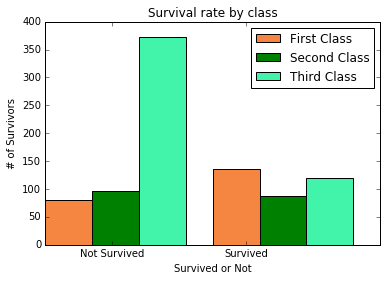

In [5]:
%pylab inline

#Did class have an effect on Survival rate.?

#splitting the data frame based on the class
first_df = titanic_df.loc[titanic_df.Pclass == 1]
second_df = titanic_df.loc[titanic_df.Pclass == 2]
third_df = titanic_df.loc[titanic_df.Pclass == 3]

group_by_first = first_df.groupby('Survived', as_index = False).count()
group_by_second = second_df.groupby('Survived',as_index = False).count()
group_by_third = third_df.groupby('Survived',as_index = False).count()

bar_width = 0.35

plt.bar([0.5, 1.75],group_by_first['PassengerId'],bar_width, color = '#f48642',label = 'First Class' )

plt.bar([0.5 + bar_width, 1.75 + bar_width], group_by_second['PassengerId'], bar_width, color = 'green',
        label = 'Second Class')
#plt.xticks(group_by_first['Survived']  + 0.5, labels, legend = 'Second Class')

plt.bar([0.85 + bar_width, 1.75 + 2* bar_width], group_by_third['PassengerId'], bar_width, color = '#42f4aa',
       label = 'Third Class')
#plt.xticks(group_by_first['Survived']  + 0.5, labels)

labels_s = ['Not Survived', 'Survived']

plt.xticks(group_by_first['Survived'] + 1, labels_s)

plt.xlabel('Survived or Not')
plt.ylabel('# of Survivors')
plt.title("Survival rate by class")
plt.legend()
plt.show()


## Conclusion:

Based on the test performed and the visualization we could conclude that passenger class had an effect on whether a passenger survived or not due to the extremenly low probability for such a large chi square value. 

#### Hence, We reject the Null hypothesis.

The dependency observed could be because of following reasons, 

- Simply more Life boats were made availble for the wealthy in the ship
- It is possible the wealthy had dedicated chaporones who could have helped them get to the safety. 
- The First class passengers could have bribed to get on the life boats. 

------
### Question # 2 : Did gender have any effect on the survival of a passenger.?

### Hypothesis Testing

Type of Test : Chi Square test of Independence (for categorical variable)

- Null Hypothesis: Survival rate is independant to Sex of a passenger.
- Alternate Hypothesis: Survival rate is dependant on the Sex of a passenger.


- Significance level (α) = 0.05
- degreesofFreedom = 1
- chicritical = 3.841 (for 0.05 significance)

In [6]:
#Implementing this using existing python library functions
from scipy.stats import chi2_contingency

groupedby_genderval = titanic_df.groupby('Survived')['Sex'].value_counts()

pivot_cont = pd.pivot_table(titanic_df[['Survived', 'Sex']], index = ['Survived'],columns = 'Sex', aggfunc = len)

print 'Contigency table: \n{}\n'.format(pivot_cont)

pivot_cont_class = pd.pivot_table(titanic_df[['Survived', 'Pclass']], index = ['Survived'],columns = 'Pclass', aggfunc = len)

chi2, pval, dof, expected = chi2_contingency(pivot_cont)

print 'Chi-Squared value: {}'.format(chi2)

print 'Probability for such a large value: {}\n'.format(pval)


Contigency table: 
Sex       female  male
Survived              
0             81   468
1            233   109

Chi-Squared value: 260.717020167
Probability for such a large value: 1.19735706278e-58



### Inferences: 

#### Chi Square test Results:

Chi Square test for independence(α=0.05)

X**2(1,N = 891) = 260.71, p < 1*e^-58

Populating the interactive namespace from numpy and matplotlib


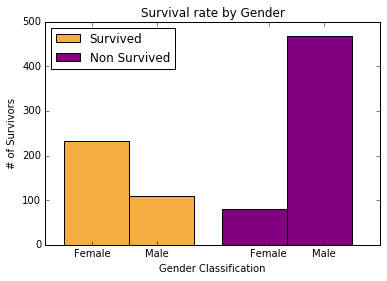

In [7]:
#Data visualization for effect of Sex on Survival rate:

survived_df = titanic_df.loc[titanic_df['Survived'] == 1]
not_survived_df = titanic_df.loc[titanic_df['Survived'] == 0]

gender_survival = survived_df.groupby('Sex', as_index = False).count()
gender_nsurvival = not_survived_df.groupby('Sex', as_index = False).count()

%pylab inline

labels = ['Female', 'Male', 'Female', 'Male']
label_y = ['Survived', 'Non Survived']

plt.bar([0.7, 1.05], gender_survival['Survived'], 
        bar_width, color = '#f4ad42' , label = 'Survived')

plt.bar([0.85 + 2*bar_width, 0.85 + 3*bar_width], 
        gender_nsurvival['Survived'], bar_width, color = 'purple',label = 'Non Survived')

plt.xticks([0.85,1.2,1.8,2.1], labels)
plt.legend(loc = 'upper left')
plt.xlabel('Gender Classification')
plt.ylabel('# of Survivors')
plt.title('Survival rate by Gender')
plt.show()

## Conclusion:

Based on the independency test and data visualization we can see a significant effect of Sex on Survival rate.

#### Hence rejecting the null hypothesis. 
-------
### Question # 3 Did having sibling had any effect on the survival.?

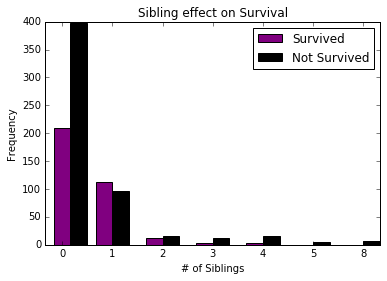

In [8]:
siblings_group_surv = survived_df.groupby('SibSp', as_index = False).count()
siblings_group_nsurv = not_survived_df.groupby('SibSp', as_index = False).count()

bar_width1 = 1

xcord1 = [0.5,3*bar_width1,6*bar_width1,9*bar_width1,
          12*bar_width1]

labels1 = ['Survived', 'Non Survived']

xcord2 = [0.5 + bar_width1,4*bar_width1,7*bar_width1,
         10*bar_width1,13*bar_width1,
         16*bar_width1, 19*bar_width1]

plt.bar(xcord1, siblings_group_surv['Survived'], bar_width1, 
        color = 'purple' , label = 'Survived')

plt.bar(xcord2, siblings_group_nsurv['Survived'], bar_width1,
        color = 'black', label = 'Not Survived')

plt.xticks([1,4,7,10,13,16,19],[0,1,2,3,4,5,8])

plt.xlabel('# of Siblings')
plt.ylabel('Frequency')
plt.title('Sibling effect on Survival')

plt.legend()

## Conclusion:

From the plot above it seems like passengers with 1 sibling fared better than other passengers.

### Question # 4 - How were the age and Fare variables distributed.?

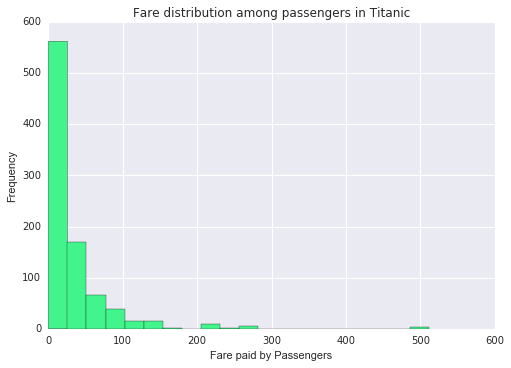

In [9]:
import seaborn as sns

plt.hist(titanic_df['Fare'], bins = 20, color = '#42f48c')

plt.xlabel('Fare paid by Passengers')
plt.ylabel('Frequency')
plt.title('Fare distribution among passengers in Titanic')

plt.show()

##### The distribution is positively skewed and has some outliers. This is analysed more in question # 5

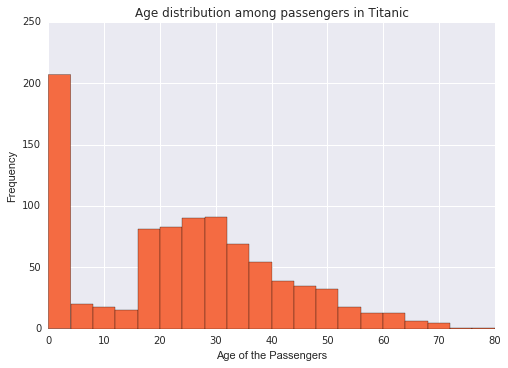

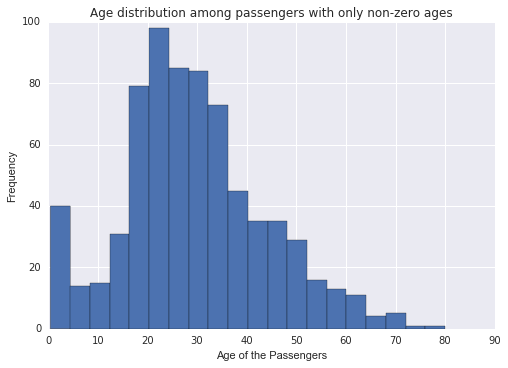

In [10]:
titanic_df_ageaszero = titanic_df

titanic_df_ageaszero['Age'] = titanic_df['Age'].fillna(0)

plt.hist(titanic_df_ageaszero['Age'], bins = 20, color = '#f46b42')

plt.xlabel('Age of the Passengers')
plt.ylabel('Frequency')
plt.title('Age distribution among passengers in Titanic')

plt.show()

age_nonzero = titanic_df.loc[titanic_df.Age != 0]

plt.hist(titanic_df_modified['Age'] , bins = 20)

plt.xlabel('Age of the Passengers')
plt.ylabel('Frequency')
plt.title('Age distribution among passengers with only non-zero ages')

plt.show()

##### The Age distribution is almost normal with significant values below 5, due to the fact about 177 values were missing and 0 was added in those place

##### Dropping the non-zero values yielded a somewhat more normal distribution

### Question # 5 - How were the fare distribution based on class and station embarked.? were there any outliers.?

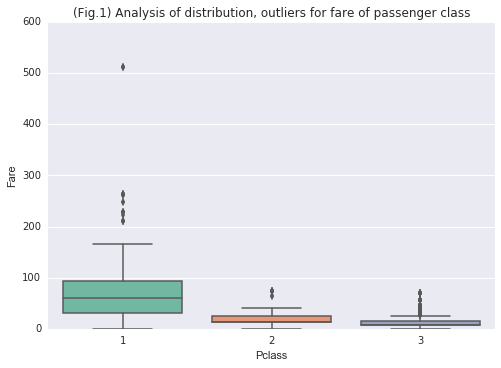

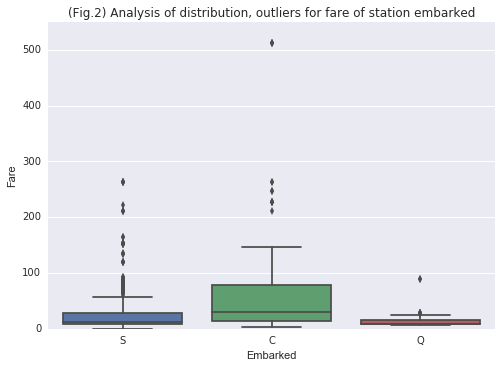

In [11]:
import seaborn as sns

sns.boxplot(x=titanic_df['Pclass'], y = titanic_df['Fare'], palette = 'Set2',linewidth = '1.5')

sns.plt.title('(Fig.1) Analysis of distribution, outliers for fare of passenger class')

sns.plt.show()

sns.boxplot(x = titanic_df['Embarked'], y = titanic_df['Fare'])

sns.plt.title('(Fig.2) Analysis of distribution, outliers for fare of station embarked')
sns.plt.ylim(0,550)
sns.plt.show()

The First plot (Fig.1) shows the class of the passengers and the fare distribution. From the plot, it looks like the first class had a varying level of ticket prices and spread around the mean well. Also, the plot shows few outliers. Also the variability of tickets for class 2 and 3 was very minimal.  

The Second plot (Fig.2), in my opinion, shows an interesting phenomenon. The passengers from Cherbourg had paid considerably varying amounts of fare and most importantly a large group of those fares are distributed above the median and third quartile. It also had quite a few outliers. Based on below findings,

1. A Large portion of data is distributed from median to the third quartile.
2. It also has a longer 3rd quartile to maximum and higher maximum value than the rest.
3. It has more outliers than the rest. 

we can predict some demographical information from this like Cherbourg might be a Middle to upper-class demography.

Although the inference from this limited data set and the visualization should not be used as an indicator for any studies or publication. 

### Data visualization between Age and Fare variables

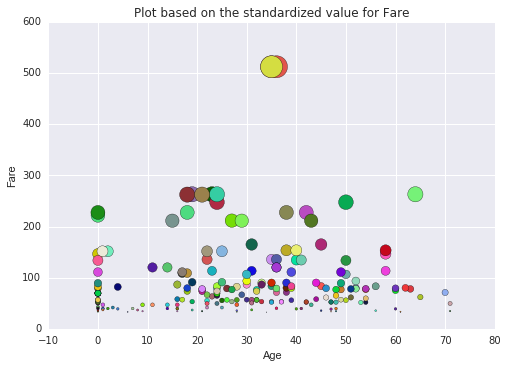

In [12]:
pointerscales = (titanic_df['Fare'] - titanic_df['Fare'].mean())/titanic_df['Fare'].std()

colors = np.random.rand(891, 3)

plt.scatter(titanic_df['Age'], titanic_df['Fare'], s = pointerscales * 50, c = colors) 

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Plot based on the standardized value for Fare')

## Final Conclusion

Although the data limitation did not allow us to run Z, T-tests, Chi-Square for categorical variable provided some interesting and important insights,

#### Analysis #1 :
The relation between the class(Socio-economic status) and Survival was, in my opinion, the most important one. It was, to a certain level, aligned with my expectation, but the strength of that relation surprised me. 

However, this do not imply any causation, and this should not be used as an indicator to arrive at any future decisions. 

#### Analysis #2 : 
The next correlation between gender and Survival rate was very much aligned with my expectation, and this was not a surprise. Any disaster should involve in getting children, women to safety and that's exactly happened here. 

However, again, this does not imply causation. 

#### Other Analysis and observation

- Passengers with one sibling seemed to have fared better based on the visualization.
- The Age frequency was almost normalized and indicates data gathered around the mean. 
- Passengers embarked from Cherbourg had paid fares higher than rest of the origin and had quite a few outliers too. 
- The first class tickets had lot of variablility in its fare. So first classe data can be used to analyse how the survival rate fared with in the class. 


Though this dataset helped in some good understanding of the disaster and provided some valuable information, it does not do much in contributing to avoid such disasters in the future because of the limitations mentioned at the beginning of the project, after all, we cannot fit all people in first class. 